In [2]:
import glob, os
from os import listdir
from os.path import isfile, join
import fnmatch
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import numpy as np
import pandas as pd
import astropy
from astropy.stats import BoxLeastSquares
import lightkurve as lk
import matplotlib.gridspec as gridspec

In [3]:
#------------------------------Finding Downloaded TESS Data Files --------------------------------------
# cleanpath = '/Users/felizd/Desktop/Felix/TESSdata/Sector01/curves/clean/' #location of where I put downloaded files
cleanpath = '/Users/felizd/Desktop/Felix/TESSdata/Sector03/' #for a specific LC
data = [os.path.join(dirpath, f) # an array of path names to be looped over
    for dirpath, dirnames, files in os.walk(cleanpath) #recursively searches through directory
    for f in fnmatch.filter(files, '*.lc')] #finds every file (*) that ends with .lc

print ("number of files: ",len(data)) #number of files)

# for d in range(len(data)):
#     print ("data set #", d+1 ," : ", data[d]) #I added the d+1 because python does zero-indexing (https://en.wikipedia.org/wiki/Zero-based_numbering)
#     print ("")

number of files:  1


In [4]:
# Nsig=3; bin_size=5; window_size=201
# # for d in range(len(data)): #creating a for loop to show light curve figures for all files
# for d in range(3): #creating a for loop to show light curve figures for all files
#     time     = np.transpose(np.loadtxt(data[d]))[0] #first  (zero indexing in python) column 
#     mag      = np.transpose(np.loadtxt(data[d]))[1] #second (zero indexing in python) column 
#     magerror = np.transpose(np.loadtxt(data[d]))[2] #third (zero indexing in python) column 
    

#     flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
#     fluxerror = flux*(10.0**(magerror/2.5)-1.0)

#     lc = lk.LightCurve(time,flux,fluxerror)
#     detrended_lc = lc.flatten(window_length=window_size).bin(binsize=bin_size).remove_outliers(sigma=Nsig)
#     detrended_lc.plot(c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig));
#     plt.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
#     plt.legend(loc='upper right')
#     plt.title(str(data[d][37:-3]))
#     plt.show()
#     print( "") #adds space between figures

In [5]:
# # print (detrended_lc.time)
# plt.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
# plt.plot(detrended_lc.time,detrended_lc.flux,c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig))
# plt.legend(loc='upper right')
# plt.title(str(data[d][37:-3]))
# plt.show()

In [ ]:
# detrended_lc.plot(c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig));
# plt.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
# plt.legend(loc='upper right')
# plt.title(str(data[d][37:-3]))
# plt.show()

In [ ]:
# print ("run BLS")
# # from astropy.stats import BoxLeastSquares
# Nsig=3; bin_size=5; window_size=201
# # for d in range(len(data)): #creating a for loop to show light curve figures for all files
# for d in range(1): #creating a for loop to show light curve figures for all files
#     time     = np.transpose(np.loadtxt(data[d]))[0] #first  (zero indexing in python) column 
#     mag      = np.transpose(np.loadtxt(data[d]))[1] #second (zero indexing in python) column 
#     magerror = np.transpose(np.loadtxt(data[d]))[2] #third (zero indexing in python) column 
    

#     flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
#     fluxerror = flux*(10.0**(magerror/2.5)-1.0)

#     lc = lk.LightCurve(time,flux,fluxerror)
#     detrended_lc = lc.flatten(window_length=window_size).bin(binsize=bin_size).remove_outliers(sigma=Nsig)
#     plt.plot(detrended_lc.time,detrended_lc.flux,c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig))
#     plt.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
#     plt.legend(loc='upper right')
#     plt.title(str(data[d][37:-3]))
#     plt.show()
    
#     bls = BoxLeastSquares(detrended_lc.time, detrended_lc.flux, detrended_lc.flux_err)
#     periods = np.arange(0.23, (max(detrended_lc.time)-min(detrended_lc.time)), 0.1)
#     durations = np.arange((1.0/24.0), (5.0/24.0), 0.1) #1 hr to 5 hrs
#     periodogram = bls.power(periods, durations,objective='snr')
#     plt.figure(figsize=(10,6))
#     plt.plot(periodogram.period, periodogram.power)
#     plt.ylabel("Power")
#     plt.xlabel("Period [day]")
#     plt.title(str(data[d][37:-3]))
#     plt.show()
    
    
    
#     best_period = periods[np.argmax(periodogram.power)]
#     print('Best Fit Period: {:0.4f} days'.format(best_period))
#     phasefoldedlc = [detrended_lc.fold(best_period).time,detrended_lc.fold(best_period).flux, detrended_lc.fold(best_period).flux_err]
    
# #     detrended_lc.fold(best_fit).plot(c='red',markersize=4,marker='.',linestyle='none')
#     plt.plot(phasefoldedlc[0],phasefoldedlc[1],c='red',markersize=4,marker='.',linestyle='none')
#     plt.legend(loc='upper right')
#     plt.title(str(data[d][37:-3]))
#     plt.show()
    
#     print( "") #adds space between figures

In [ ]:
# index = np.argmax(periodogram.power); print(index)
# best_period = periodogram.period[index]; print(best_period)
# best_t0 = periodogram.transit_time[index]; print(best_t0)
# best_duration = periodogram.duration[index];print(best_duration)


# # best_period = periods[np.argmax(periodogram.power)]
# # print('Best Fit Period: {:0.4f} days'.format(best_period))

# # detrended_lc.fold(best_period).plot(c='red',markersize=4,marker='.',linestyle='none')
# index = np.argmax(periodogram.power); print(index)
# best_period = periodogram.period[index]; print(best_period)
# best_t0 = periodogram.transit_time[index]; print(best_t0)
# plt.plot(detrended_lc.fold(period=best_period,t0=best_t0).phase,detrended_lc.fold(period=best_period,t0=best_t0).flux,c='red',markersize=4,marker='.',linestyle='none',label='Period: '+str(np.round(best_period,2))+", TC: "+str(np.round(best_t0,2)))
# plt.legend(loc='upper right')
# plt.title(str(data[d][37:-3]))
# plt.show()

54
5.630000000000001
4.522989666666435


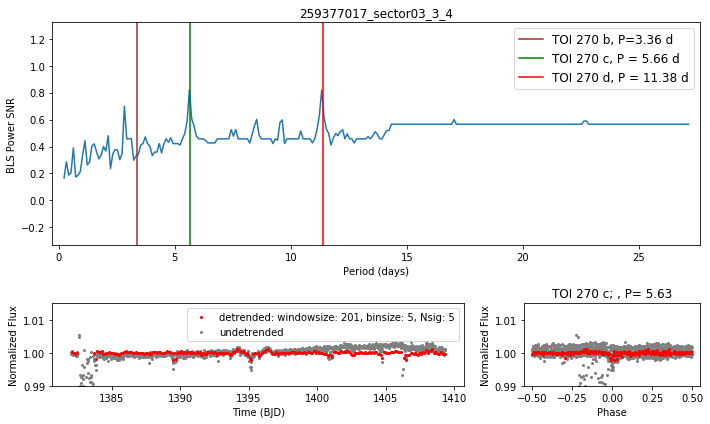

In [34]:
BLSstepsize=0.1; Nsig=5; bin_size=5; window_size=201
# for d in range(10): #creating a for loop to show light curve figures for all files
for d in range(len(data)): #creating a for loop to show light curve figures for all files
    time     = np.transpose(np.loadtxt(data[d]))[0] #first  (zero indexing in python) column 
    mag      = np.transpose(np.loadtxt(data[d]))[1] #second (zero indexing in python) column 
    magerror = np.transpose(np.loadtxt(data[d]))[2] #third (zero indexing in python) column 
    
    flux = 10.0**(mag/-2.5)/np.mean(10.0**(mag/-2.5))
    fluxerror = flux*(10.0**(magerror/2.5)-1.0)
    
    #detrending
    lc = lk.LightCurve(time,flux,fluxerror)
    detrended_lc = lc.flatten(window_length=window_size).bin(binsize=bin_size).remove_outliers(sigma=Nsig)
    
    #doing BLS search:
    bls = BoxLeastSquares(detrended_lc.time, detrended_lc.flux, detrended_lc.flux_err)
    periods = np.arange(0.23, (max(detrended_lc.time)-min(detrended_lc.time)), 0.1)
    durations = np.arange((1.0/24.0), (5.0/24.0), 0.1) #1 hr to 5 hrs
    periodogram = bls.power(periods, durations,objective='snr')
    
    #phase folding with best BLS model
    index = np.argmax(periodogram.power); print(index)
    best_period = periodogram.period[index]; print(best_period)
    best_t0 = periodogram.transit_time[index]; print(best_t0)
    detrendedphasefoldedlc = [detrended_lc.fold(period=best_period,t0=best_t0).phase,detrended_lc.fold(period=best_period,t0=best_t0).flux, detrended_lc.fold(period=best_period,t0=best_t0).flux_err]
    phasefoldedlc = [lc.fold(period=best_period,t0=best_t0).phase,lc.fold(period=best_period,t0=best_t0).flux, lc.fold(period=best_period,t0=best_t0).flux_err]

    
    gs1 = gridspec.GridSpec(3, 3)
    gs1.update(left=0.65, right=1.25, wspace=0.25,hspace=0.5)


    f = plt.figure(figsize=(10,6))
    ax1 = f.add_subplot(gs1[:-1, :])
    ax2 = f.add_subplot(gs1[-1, :-1])
    ax3 = f.add_subplot(gs1[-1, -1])

    
    
    
    
    ax1.plot(periodogram.period, periodogram.power, rasterized=True) 
    plt.xticks(np.arange(0.0, 31.0, 1.0))
    ax1.set_title(str(data[d][46:-3]))
    ax1.set_xlabel("Period (days)")
    ax1.set_xlim(np.min(periodogram.period)-0.5, np.max(periodogram.period)+0.5)
    ax1.set_ylabel("BLS Power SNR")
    ax1.set_ylim(np.min(periodogram.power)-0.5, np.max(periodogram.power)+0.5)
    ax1.axvline(x=3.36,c='brown',label='TOI 270 b, P=3.36 d')
    ax1.axvline(x=5.66,c='g',label='TOI 270 c, P = 5.66 d ')
    ax1.axvline(x=11.38,c='r',label='TOI 270 d, P = 11.38 d') 
    ax1.legend(loc='best',fontsize=12)

    
    ax2.plot(detrended_lc.time,detrended_lc.flux,c='red',markersize=4,marker='.',linestyle='none',zorder=1,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig))
    ax2.plot(time,flux,c='grey',marker='.',markersize=4,linestyle='none',zorder=0,label='undetrended')
#     ax2.legend(loc='upper right')
    ax2.set_ylim(0.99,1.015)
    ax2.set_xlabel("Time (BJD)")
    ax2.set_ylabel("Normalized Flux")
    ax2.legend(loc='best')

    ax3.plot(detrendedphasefoldedlc[0],detrendedphasefoldedlc[1],c='red',markersize=4,marker='.',linestyle='none',zorder=1)#,label='detrended: windowsize: '+str(window_size)+", binsize: "+str(bin_size)+", Nsig: "+str(Nsig))
    ax3.plot(phasefoldedlc[0],phasefoldedlc[1],c='grey',marker='.',markersize=4,linestyle='none',zorder=0)#,label='undetrended')
#     ax3.legend(loc='upper right')
    ax3.set_xlabel("Phase")
    ax3.set_ylabel("Normalized Flux") 
    ax3.set_ylim(0.99,1.015)
    ax3.set_xticks(np.arange(np.min(phasefoldedlc[0]),np.max(phasefoldedlc[0])+0.25,0.25))
#     ax3.legend(loc='upper right')
    ax3.set_title('TOI 270 c; '+", P= "+str(np.round(best_period,3)))
    gs1.tight_layout(f)

    plt.savefig("plots/"+str(data[d][46:-3])+".png", dpi=400, rasterized=True,bbox_inches='tight')        
    plt.show()
    print ("")

In [23]:
print (str(np.round(best_t0,3)), str(np.round(best_period,3)))

4.523 5.63


In [31]:
print (data[d][46:-3])

259377017_sector03_3_4
